In [1]:
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('wave_height.csv')
# dimensão dos dados
data.shape

(469619, 2)

In [3]:
# frequencia alta e irregular
data.head(10)

,time,SignificantWaveHeight
0,2016-01-01 00:00:00,5.877
1,2016-01-01 00:03:00,5.930
2,2016-01-01 00:07:00,6.036
3,2016-01-01 00:10:00,6.120
4,2016-01-01 00:13:00,6.519
5,2016-01-01 00:17:00,6.515
6,2016-01-01 00:20:00,6.394
7,2016-01-01 00:23:00,6.372
8,2016-01-01 00:27:00,6.382
9,2016-01-01 00:30:00,6.249


In [4]:
wave = pd.Series(data['SignificantWaveHeight'])

In [5]:
# transformando os dados para pd.Series com indice no tempo
wave.index = pd.to_datetime(data['time'])

In [6]:
wave.head(10)

time
2016-01-01 00:00:00    5.877
2016-01-01 00:03:00    5.930
2016-01-01 00:07:00    6.036
2016-01-01 00:10:00    6.120
2016-01-01 00:13:00    6.519
2016-01-01 00:17:00    6.515
2016-01-01 00:20:00    6.394
2016-01-01 00:23:00    6.372
2016-01-01 00:27:00    6.382
2016-01-01 00:30:00    6.249
Name: SignificantWaveHeight, dtype: float64

In [7]:
# existem valores omissos
wave.isna().sum() / wave.shape

array([0.00389678])

In [8]:
# propagando o último valor conhecido para a frente
wave = wave.ffill()

In [9]:
# re-amostrar para dados horários
wave = wave.resample('H').mean()

In [10]:
wave.head(10)

time
2016-01-01 00:00:00    6.085000
2016-01-01 01:00:00    5.989611
2016-01-01 02:00:00    5.494222
2016-01-01 03:00:00    5.170778
2016-01-01 04:00:00    5.362333
2016-01-01 05:00:00    4.876556
2016-01-01 06:00:00    5.110222
2016-01-01 07:00:00    4.856111
2016-01-01 08:00:00    5.071167
2016-01-01 09:00:00    4.984167
Freq: H, Name: SignificantWaveHeight, dtype: float64

In [11]:
wave.describe()

count    26137.000000
mean         2.798685
std          1.535360
min          0.002000
25%          1.705778
50%          2.495333
75%          3.487889
max         14.044647
Name: SignificantWaveHeight, dtype: float64

<AxesSubplot:xlabel='time'>

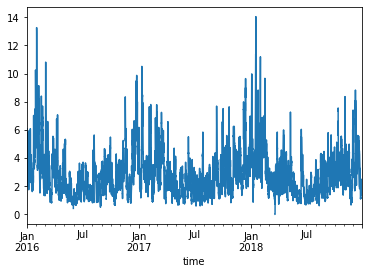

In [12]:
wave.plot(x='time', y='SignificantWaveHeight')

<AxesSubplot:ylabel='Frequency'>

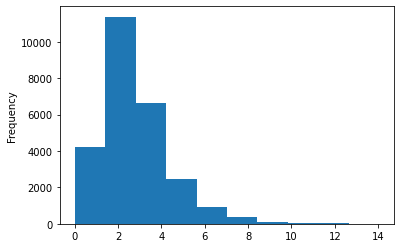

In [13]:
# tem valores extremos
wave.plot.hist()

In [14]:
# algumas horas não tem qualquer observação
wave.isna().sum() / wave.shape

array([0.0031275])

In [15]:
wave = wave.ffill()

In [17]:
from pmdarima.arima import ndiffs, nsdiffs

print(ndiffs(wave, test='kpss'))
print(ndiffs(wave, test='adf'))
print(ndiffs(wave, test='pp'))

1
0
0


In [20]:
nsdiffs(wave,m=24*365)

0

0.2574611230176863

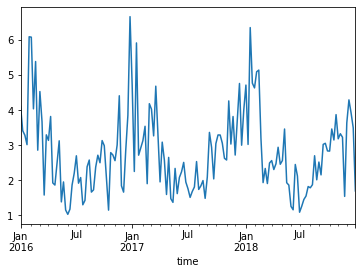

In [21]:
wave_d = wave.resample('W').mean()
wave_d.plot()

# heterocedastidade
from heteroskedasticity import het_tests

p_value = het_tests(wave_d, test='white')
# p_value = het_tests(series, test='breuschpagan')

p_value